### DONE DURING CLEANING:
- Remove outliers from rent_pcm & deposit columns by using Inter Quartile Range (IQR) as other methods were based on mean, and these outliers would have affected the mean.

- Created a "Type" column that has the value of either Shared (shared room in an existing house), Studio, Maisonette, or "flat" which covers all other types of houses.

## IMPORTS

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## DATA OVERVIEW

In [31]:
data = pd.read_csv('all_rental_data.csv')
data.head(2)

,property_id,property_link,listing_title,description,location,num_bedrooms,num_bathrooms,max_tenants,deposit,rent_pcm,...,available_from,min_tenancy_months,garden,parking,fireplace,furnishing,closest_station,closest_station_mins,postcode,scrape_date
0,1167183.0,https://www.openrent.co.uk//1167183,"Studio Flat, Coventry House, SW1Y",Directly underneath Piccadilly's second digita...,London,1.0,1.0,2.0,2307.0,2000.0,...,15-Sep-21,9.0,No,No,No,Furnished,Piccadilly Circus Station,1.0,SW1Y,15-Sep-21
1,1134557.0,https://www.openrent.co.uk//1134557,"2 Bed Flat, Garrick Street, WC2E",We are proud to offer this delightful 2 bedroo...,London,2.0,1.0,3.0,3949.0,3423.0,...,15-Sep-21,6.0,No,Yes,No,Furnished,Leicester Square Station,1.0,WC2E,15-Sep-21


In [32]:
# Check for nulls & data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           2550 non-null   float64
 1   property_link         2550 non-null   object 
 2   listing_title         2550 non-null   object 
 3   description           2550 non-null   object 
 4   location              2550 non-null   object 
 5   num_bedrooms          2550 non-null   float64
 6   num_bathrooms         2550 non-null   float64
 7   max_tenants           2550 non-null   float64
 8   deposit               2550 non-null   float64
 9   rent_pcm              2550 non-null   float64
 10  bills_included        2550 non-null   object 
 11  student_friendly      2550 non-null   object 
 12  family_friendly       2550 non-null   object 
 13  pet_friendly          2550 non-null   object 
 14  smoker_friendly       2550 non-null   object 
 15  available_from       

In [33]:
data.describe()

,property_id,num_bedrooms,num_bathrooms,max_tenants,deposit,rent_pcm,min_tenancy_months,closest_station_mins
count,2.550000e+03,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000
mean,1.175349e+06,1.898824,1.394510,2.711373,2281.724706,2502.312549,7.615686,6.280392
std,1.027133e+05,1.054404,0.662604,1.546909,2101.056026,1888.773109,4.467369,3.707029
min,1.070500e+04,1.000000,1.000000,1.000000,0.000000,500.000000,1.000000,0.000000
25%,1.178451e+06,1.000000,1.000000,2.000000,950.000000,1350.000000,6.000000,4.000000
50%,1.203316e+06,2.000000,1.000000,2.000000,1846.000000,1950.000000,6.000000,6.000000
75%,1.212776e+06,2.000000,2.000000,4.000000,2800.000000,2990.000000,12.000000,8.000000
max,1.221910e+06,6.000000,5.000000,12.000000,15500.000000,15500.000000,30.000000,23.000000


## EDA & CLEANING

### Check initial distributions

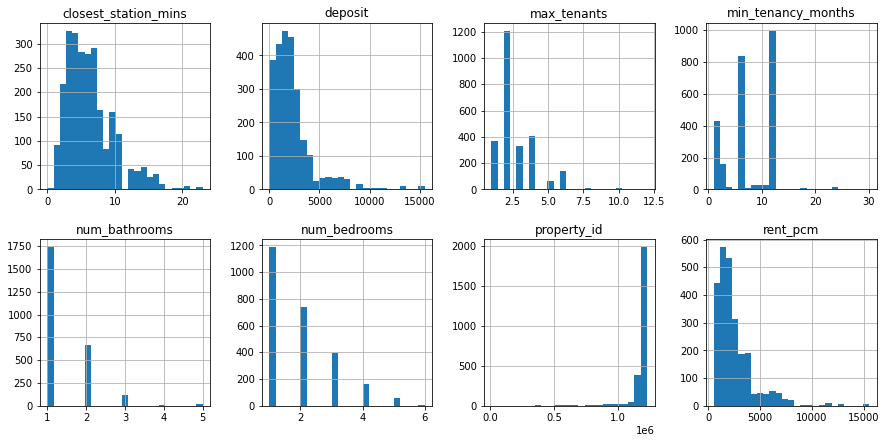

In [34]:
data.hist(bins=25, layout=(4,4), figsize=(15,15));

Using both the histograms generated above, as well as information from the .describe method used above, I can tell that there seem to be a couple of outliers; most obviously in the rent_pcm and deposit features. 

Since this data suffers from outliers and the mean will therefore be affected, I chose to use the Inter Quartile Range (IQR) to filter out data points that are skewing the distribution.

In [35]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [36]:
data = remove_outlier(data, 'deposit')
data = remove_outlier(data, 'rent_pcm')

In [37]:
data.describe()

,property_id,num_bedrooms,num_bathrooms,max_tenants,deposit,rent_pcm,min_tenancy_months,closest_station_mins
count,2.277000e+03,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000,2277.000000
mean,1.173756e+06,1.797101,1.277558,2.465086,1807.524813,1976.951691,7.806324,6.463329
std,1.073118e+05,1.018343,0.530520,1.314793,1088.223436,925.599856,4.516499,3.770911
min,1.070500e+04,1.000000,1.000000,1.000000,0.000000,500.000000,1.000000,0.000000
25%,1.178532e+06,1.000000,1.000000,2.000000,950.000000,1295.000000,6.000000,4.000000
50%,1.203927e+06,1.000000,1.000000,2.000000,1788.000000,1800.000000,6.000000,6.000000
75%,1.212737e+06,2.000000,1.000000,3.000000,2499.000000,2580.000000,12.000000,8.000000
max,1.221910e+06,6.000000,5.000000,12.000000,5192.000000,4500.000000,30.000000,23.000000


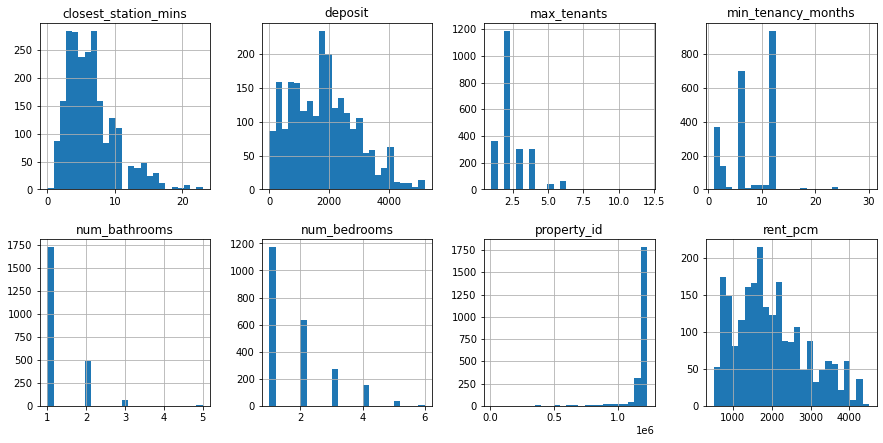

In [38]:
data.hist(bins=25, layout=(4,4), figsize=(15,15));

I can see that the deposit & rent_pcm features already look a little bit better, and more normally distributed now that the obvious outliers have been removed.

### More in-depth EDA

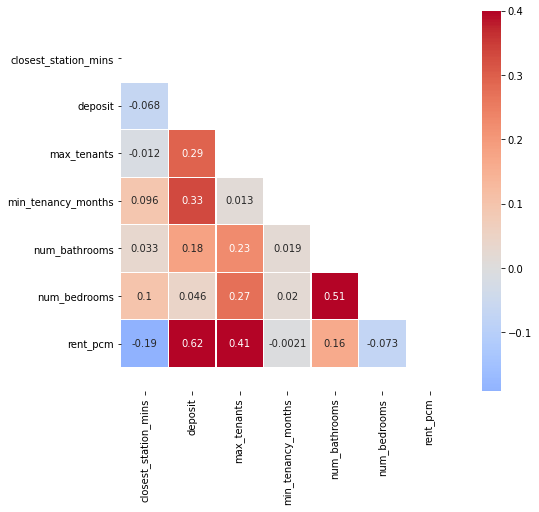

In [39]:
# Check correlations between continuous features
corr_mat = data[['closest_station_mins','deposit','max_tenants','min_tenancy_months',
                     'num_bathrooms','num_bedrooms','rent_pcm']].corr()
corr_mat

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 7))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, cmap='coolwarm', vmax = 0.4, center=0, square=True,
             linewidths=0.2,annot = True)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t); # update the ylim(bottom, top) values

The features most closely correlated with the target variable (rent_pcm) at this stage are max_tenants & deposit. 

In [40]:
# Explore the categorical features (postcode will be explored seperately)
data_cat = data[['bills_included','student_friendly', 'family_friendly', 'pet_friendly', 'smoker_friendly', 
                 'garden','parking', 'fireplace', 'furnishing', 'rent_pcm']]

In [41]:
def plot_categorical_feature(data, feature, target_feature, estimator = np.median):
    if feature != target_feature:
        plt.figure(figsize=(15,8))
    
        # Plot Distribution
        plt.subplot(1,2,1)
        sns.countplot(data[feature])
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('# Observations', fontsize=12)
        plt.title(f'Distribution of {feature}', fontsize=14);

        # Plot against target feature
        plt.subplot(1,2,2)
        sns.barplot(x = feature, y=target_feature, data = data, estimator=estimator)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel(f'{target_feature}', fontsize=12)
        plt.title(f'{target_feature} vs {feature}', fontsize=14);
    else:
        pass

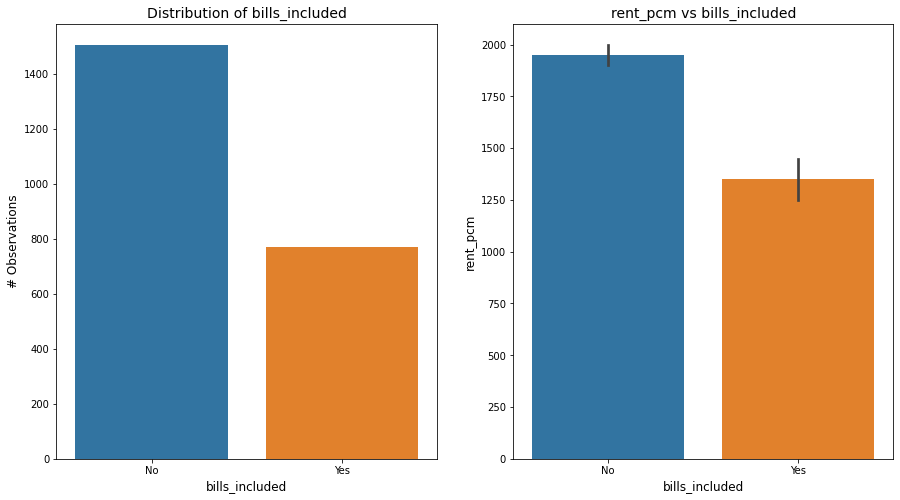

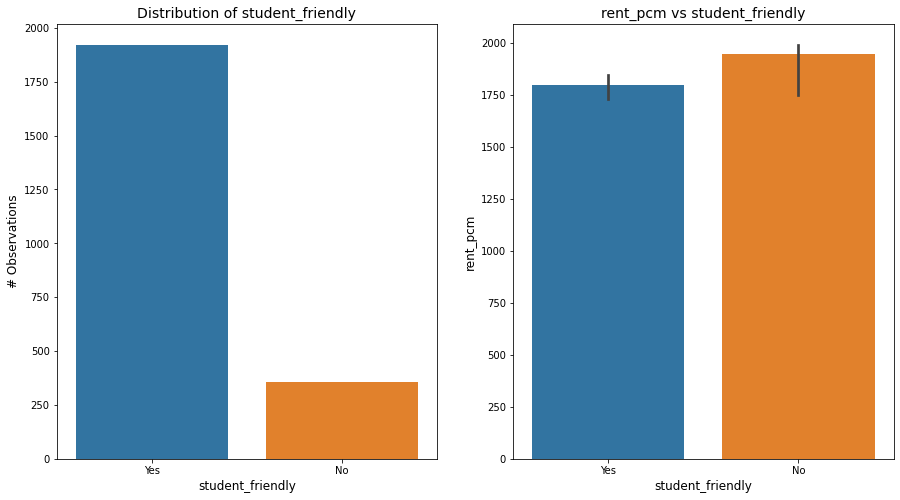

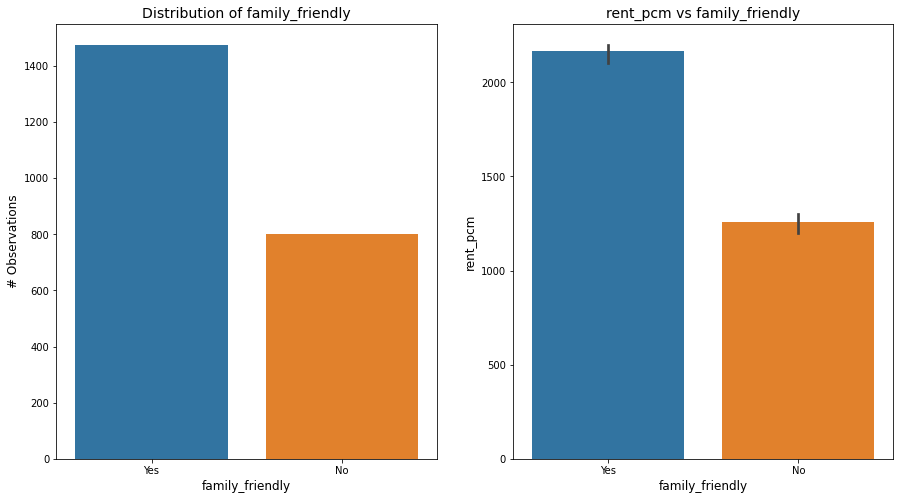

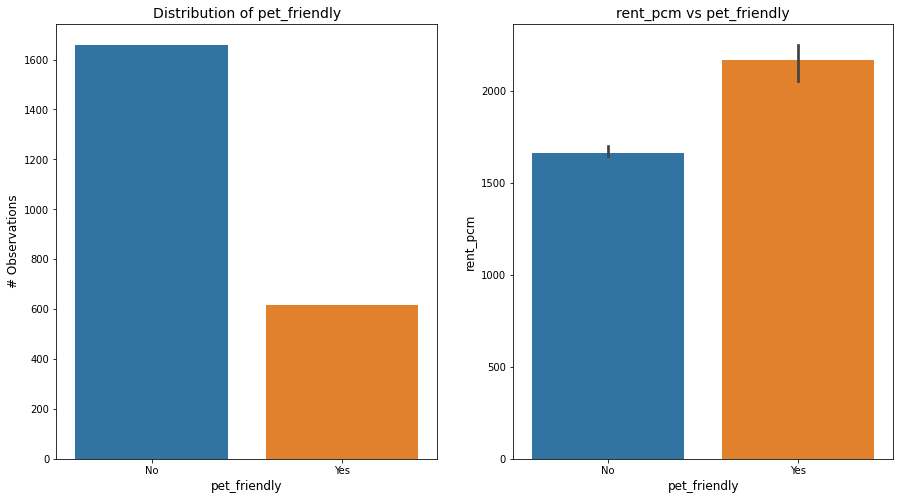

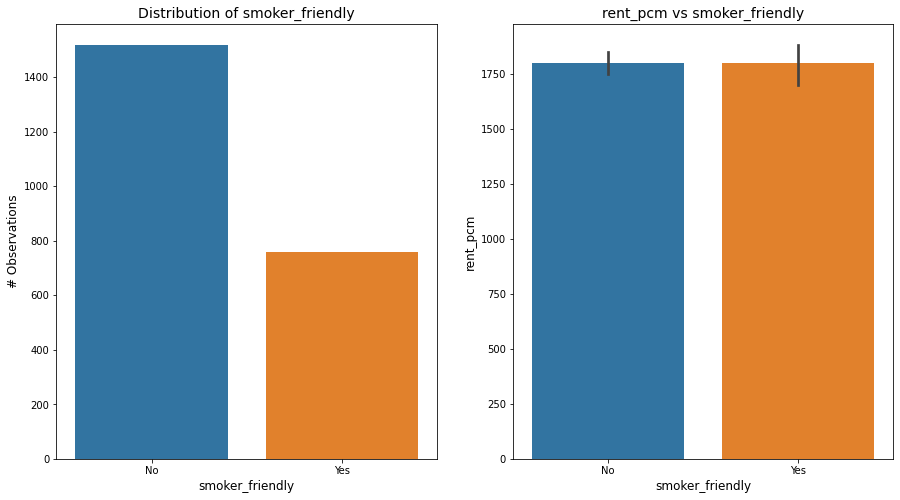

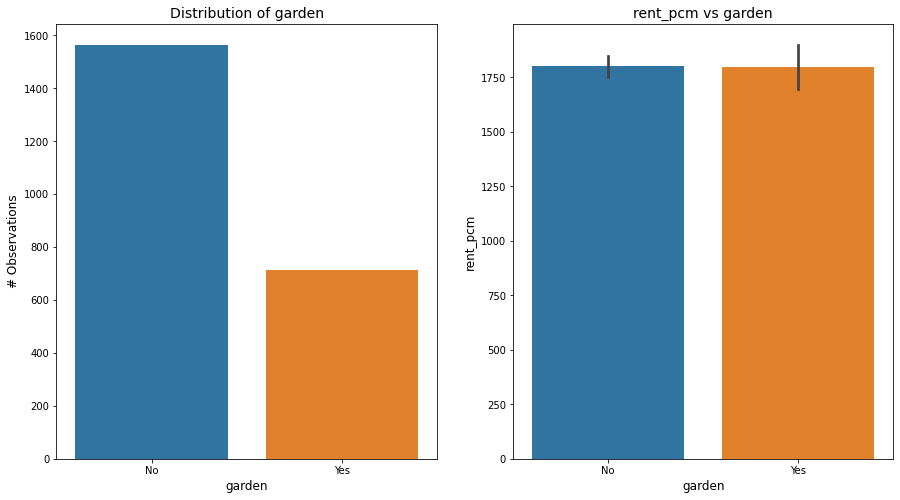

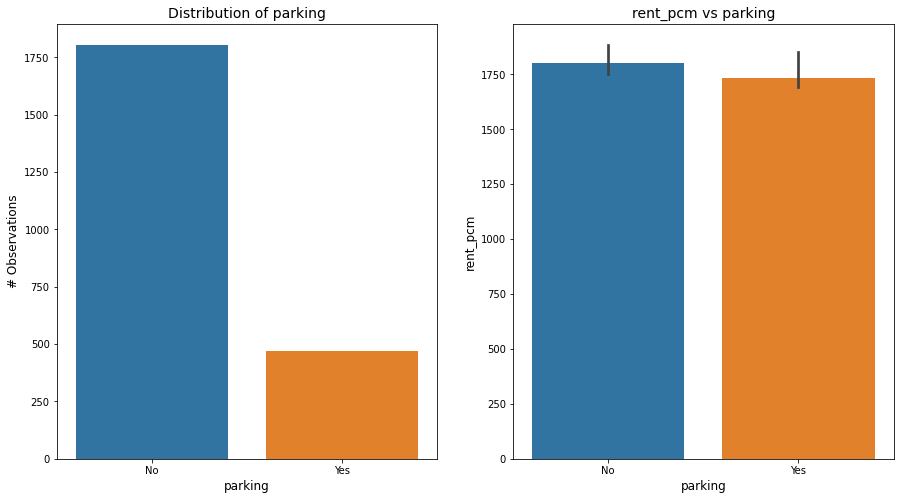

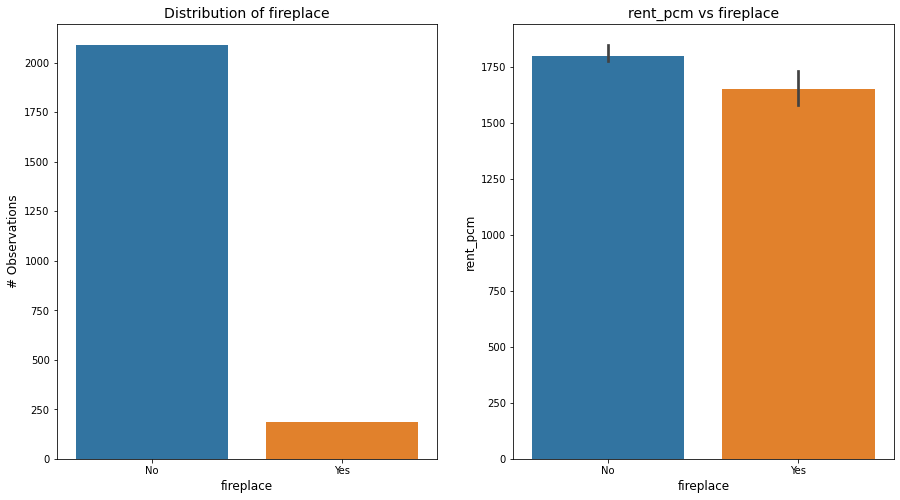

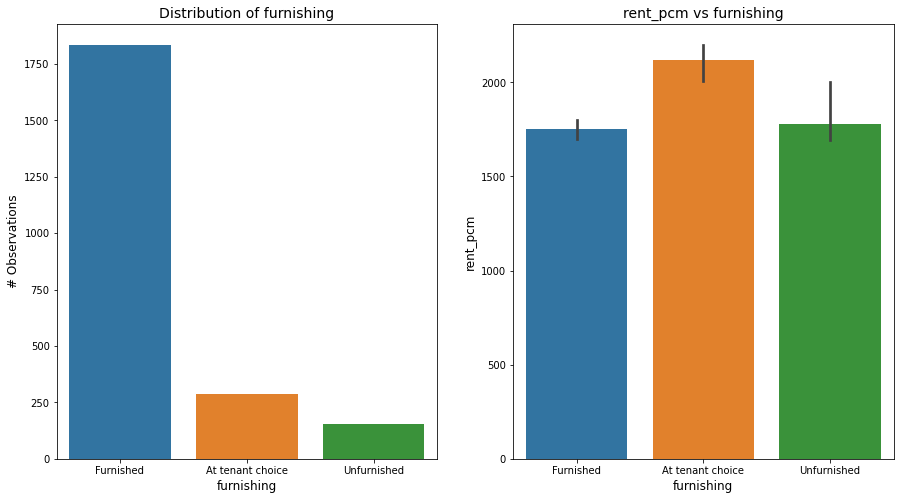

In [42]:
for feature in data_cat.columns: 
    plot_categorical_feature(data_cat, feature, 'rent_pcm')


There is nothing too surprising about monthly rent compared to some of the specs of the flat. The only thing that stood out immediately was that flats with bills included tended to have a lower median monthly rent than those without. This could be due to the fact that these listings are for rooms only in flatshares where the other flatmates already have bills set up. Or it could simply be due to the low number of listings I had at the time of creating this notebook.

In [43]:
# Create pivot table for neighbourhood
pd.set_option('display.max_rows', None)
print(pd.pivot_table(data = data, index = 'postcode', values = 'rent_pcm', 
            aggfunc = 'median').sort_values('rent_pcm', ascending = False))

          rent_pcm
postcode          
W1W         4333.0
W1K         4040.5
EC2A        4000.0
EC4A        3800.0
EC4V        3800.0
EC1Y        3600.0
W1G         3595.0
SW1X        3500.0
W1T         3250.0
WC1V        3206.0
WC2B        3200.0
WC2R        3000.0
W1J         2903.0
EC1N        2787.5
EC1M        2700.0
EC1V        2700.0
N1C         2600.0
WC1H        2600.0
WC1R        2550.0
WC1A        2530.0
E1W         2500.0
W11         2500.0
WC2H        2491.0
W1H         2470.0
WC1N        2350.0
EC2Y        2250.0
SW11        2200.0
W8          2191.5
SW4         2190.0
E8          2177.5
W9          2167.0
SW1V        2100.0
NW8         2100.0
SE11        2045.0
SW1Y        2000.0
SW1P        1993.0
SW10        1950.0
SE1         1950.0
SW5         1949.5
NW5         1900.0
NW3         1842.0
SW7         1800.0
EC1R        1800.0
W1B         1795.0
WC2E        1776.0
W1D         1750.0
W2          1750.0
E1          1750.0
E2          1700.0
SE17        1695.0
SW3         

There don't seem to be any real patterns jumping out at me when looking at the postcodes for these listings. Each area has both some expensive and some cheaper listings.

## FEATURE ENGINEERING

In [72]:
type_conditions = [
    (data['listing_title'].str.lower().str.contains('studio')),
    (data['listing_title'].str.lower().str.contains('shared')),
    (data['listing_title'].str.lower().str.contains('maisonette'))
    ]
type_values = ['studio', 'shared', 'maisonette']

In [73]:
data['type'] = np.select(type_conditions, type_values, default='flat')

In [78]:
data[['listing_title', 'type']].head()

,listing_title,type
0,"Studio Flat, Coventry House, SW1Y",studio
1,"2 Bed Flat, Garrick Street, WC2E",flat
2,"1 Bed Flat, Meridian House, WC2H",flat
4,"1 Bed Flat, Marconi House, WC2R",flat
5,"2 Bed Flat, Drury Lane, WC2B",flat


In [80]:
# Availability season
# Part of London (N,E,S,W)
# Bathrooms to bedrooms ratio

In [81]:
data.columns

Index(['property_id', 'property_link', 'listing_title', 'description',
       'location', 'num_bedrooms', 'num_bathrooms', 'max_tenants', 'deposit',
       'rent_pcm', 'bills_included', 'student_friendly', 'family_friendly',
       'pet_friendly', 'smoker_friendly', 'available_from',
       'min_tenancy_months', 'garden', 'parking', 'fireplace', 'furnishing',
       'closest_station', 'closest_station_mins', 'postcode', 'scrape_date',
       'type'],
      dtype='object')